*Created at: 17/08/2024*

<a href='https://www.dicoding.com/users/maulanakavaldo/' target="_blank">Dicoding</a> /
<a href='https://www.linkedin.com/in/maulana-kavaldo/' target="_blank">LinkedIn</a> /
<a href='https://github.com/maulanakavaldo' target="_blank">Github</a>

---

Nama        : Maulana Kavaldo

IdDicoding  : mkavaldo

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Data Loading

In [2]:
df = pd.read_csv('dataset/Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

✨ Jumlah data sebanyak 8128 baris

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


✨ Hasil Analisis:

- Data tahun menunjukkan distribusi tahun pembuatan mobil. Rata-rata tahun produksi mobil adalah sekitar tahun 2014, dengan mayoritas mobil diproduksi antara tahun 2011 dan 2017. Rentang tahun yang panjang menunjukkan variasi yang cukup besar, dengan mobil tertua diproduksi pada tahun 1983 dan yang terbaru pada tahun 2020.

- Harga jual mobil menunjukkan distribusi yang cukup lebar dengan rata-rata sekitar 638.272. Dengan standar deviasi yang besar, ini menunjukkan bahwa ada perbedaan signifikan dalam harga jual mobil, mungkin disebabkan oleh perbedaan merk, model, atau kondisi mobil. Nilai median (450.000) menunjukkan bahwa setengah dari mobil dijual di bawah harga ini, sementara 25% teratas dijual dengan harga di atas 675.000. Harga tertinggi mencapai 10 juta, yang bisa menunjukkan mobil mewah atau baru.

- Data jarak tempuh mobil menunjukkan bahwa rata-rata mobil telah menempuh sekitar 69.819 km. Namun, variasi dalam data ini juga besar, dengan beberapa mobil baru (1 km) hingga mobil yang telah digunakan sangat lama (lebih dari 2 juta km). Mayoritas mobil telah menempuh jarak antara 35.000 km hingga 98.000 km.

- Data jumlah kursi menunjukkan bahwa sebagian besar mobil memiliki 5 kursi, yang umum untuk mobil penumpang. Ada sedikit variasi, dengan beberapa mobil hanya memiliki 2 kursi (mungkin mobil sport atau pickup), dan beberapa mobil memiliki hingga 14 kursi (kemungkinan kendaraan komersial atau minibus).

### > Delete Column

Menghapus kolom torque, karena data kolom ini masih kurang menentukan nilai data yang tepat. Sehingga data ini tidak digunakan.

In [6]:
df.drop(['torque'], axis=1, inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


### > Duplicate Data

In [7]:
df.duplicated().sum()

1202

⚠️ Setelah dilakukan pengecekan, ternyata terdapat 1202 data yang duplikat. Tentunya data duplikat ini perlu dihapus.

In [8]:
df = df.drop_duplicates()
df.shape

(6926, 12)

✅ Data duplicate sudah dihapus dan didapatkan data sebanyak 6926 tanpa duplikat.

### > Missing Values

In [9]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.shape

(6718, 12)

✨ Jumlah data setelah dilakukan penghapusan missing value sebanyak 7907.

# Data Preprocessing

### Fitur baru

Fitur baru bernama `age` untuk mengetahui umur dari kendaraan.

In [12]:
df['age'] = 2024 - df['year']
df.drop(['year'], axis=1, inplace=True)

Fitur baru bernama `brand` dari kendaraan yang didapatkan dari kolom `name`.

In [13]:
df['brand'] = df['name'].str.split(' ').str.get(0)
df.drop(['name'],axis=1,inplace=True)

In [14]:
first_column = df.pop('brand')
df.insert(0, 'brand', first_column)

In [15]:
df.head()

,brand,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,10
1,Skoda,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,10
2,Honda,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,18
3,Hyundai,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,14
4,Maruti,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,17


## Remove unit

Pada kolom mileage, engine dan max_power masih terdapat unit (satuannya). Pada langkah ini akan dilakukan penghapusan dan mengambil angkanya saja.

In [16]:
def remove_unit_and_convert(df, col_name, to_type=float):
    df[col_name] = df[col_name].apply(lambda x: str(x).split(' ')[0])
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce').astype(to_type)
    return df

df = remove_unit_and_convert(df, 'mileage', float)
df = remove_unit_and_convert(df, 'engine', int)
df = remove_unit_and_convert(df, 'max_power', float)

df.head()

,brand,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,10
1,Skoda,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,10
2,Honda,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,18
3,Hyundai,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,14
4,Maruti,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,17


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          6718 non-null   object 
 1   selling_price  6718 non-null   int64  
 2   km_driven      6718 non-null   int64  
 3   fuel           6718 non-null   object 
 4   seller_type    6718 non-null   object 
 5   transmission   6718 non-null   object 
 6   owner          6718 non-null   object 
 7   mileage        6718 non-null   float64
 8   engine         6718 non-null   int32  
 9   max_power      6717 non-null   float64
 10  seats          6718 non-null   float64
 11  age            6718 non-null   int64  
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 656.1+ KB


In [18]:
df.dropna(axis=0, inplace=True)

## Menghapus outlier (Filter)

In [ ]:
df_clean = df.copy()

df_clean = df_clean[
    (df_clean['selling_price'] < 2500000) & 
    (df_clean['km_driven'] < 300000) & 
    (~df_clean['fuel'].isin(['CNG', 'LPG'])) & 
    (df_clean['mileage'].between(5, 35)) & 
    (df_clean['max_power'] < 300)
]

# Transformasi logaritma
df_clean['selling_price'] = np.log(df_clean['selling_price'])
df_clean['max_power'] = np.log(df_clean['max_power'])
df_clean['age'] = np.log(df_clean['age'])

df_clean.head()

,brand,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti,13.017003,145500,Diesel,Individual,Manual,First Owner,23.40,1248,4.304065,5.0,2.302585
1,Skoda,12.821258,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,4.639765,5.0,2.302585
2,Honda,11.970350,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,4.356709,5.0,2.890372
3,Hyundai,12.323856,127000,Diesel,Individual,Manual,First Owner,23.00,1396,4.499810,5.0,2.639057
4,Maruti,11.775290,120000,Petrol,Individual,Manual,First Owner,16.10,1298,4.479607,5.0,2.833213


✅ Berhasil membuat fitur baru bernama age dan brand.

# EDA

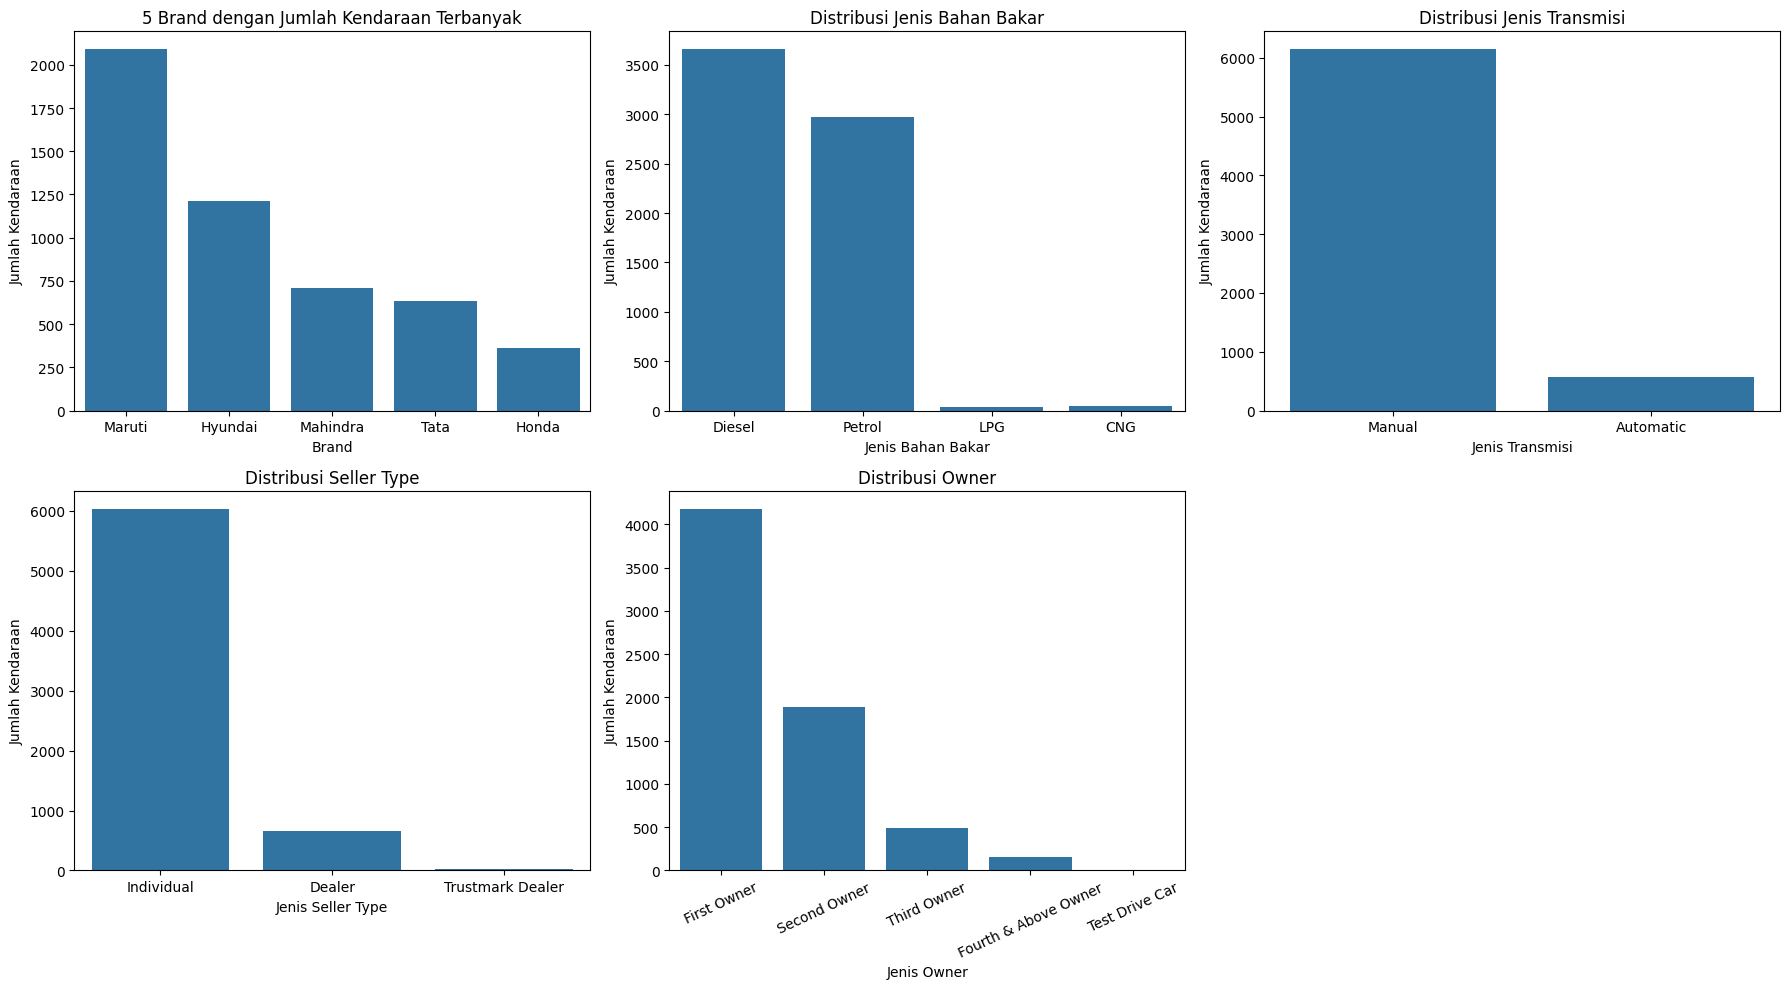

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: 5 Brand dengan Jumlah Kendaraan Terbanyak
top_5_brands = df['brand'].value_counts().nlargest(5)
sns.barplot(x=top_5_brands.index, y=top_5_brands.values, ax=axes[0, 0])
axes[0, 0].set_title('5 Brand dengan Jumlah Kendaraan Terbanyak')
axes[0, 0].set_xlabel('Brand')
axes[0, 0].set_ylabel('Jumlah Kendaraan')

# Plot 2: Distribusi Jenis Bahan Bakar
sns.countplot(x='fuel', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Jenis Bahan Bakar')
axes[0, 1].set_xlabel('Jenis Bahan Bakar')
axes[0, 1].set_ylabel('Jumlah Kendaraan')

# Plot 3: Distribusi Jenis Transmisi
sns.countplot(x='transmission', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribusi Jenis Transmisi')
axes[0, 2].set_xlabel('Jenis Transmisi')
axes[0, 2].set_ylabel('Jumlah Kendaraan')

# Plot 4: Distribusi Seller Type
sns.countplot(x='seller_type', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Seller Type')
axes[1, 0].set_xlabel('Jenis Seller Type')
axes[1, 0].set_ylabel('Jumlah Kendaraan')

# Plot 5: Distribusi Owner
sns.countplot(x='owner', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Owner')
axes[1, 1].set_xlabel('Jenis Owner')
axes[1, 1].set_ylabel('Jumlah Kendaraan')
axes[1, 1].tick_params(axis='x', rotation=25)

fig.delaxes(axes[1, 2])
plt.tight_layout()

plt.show()

Pada grafik menunjukkan lima merek kendaraan dengan jumlah terbanyak, dengan merek teratas memiliki sekitar 2000 kendaraan. 

Kendaraan lebih didominasi berbahan bakar diesel dan petrol.

Jenis transmisi manual jauh lebih dominan dibandingkan otomatis, mencapai hampir 10.000 kendaraan.

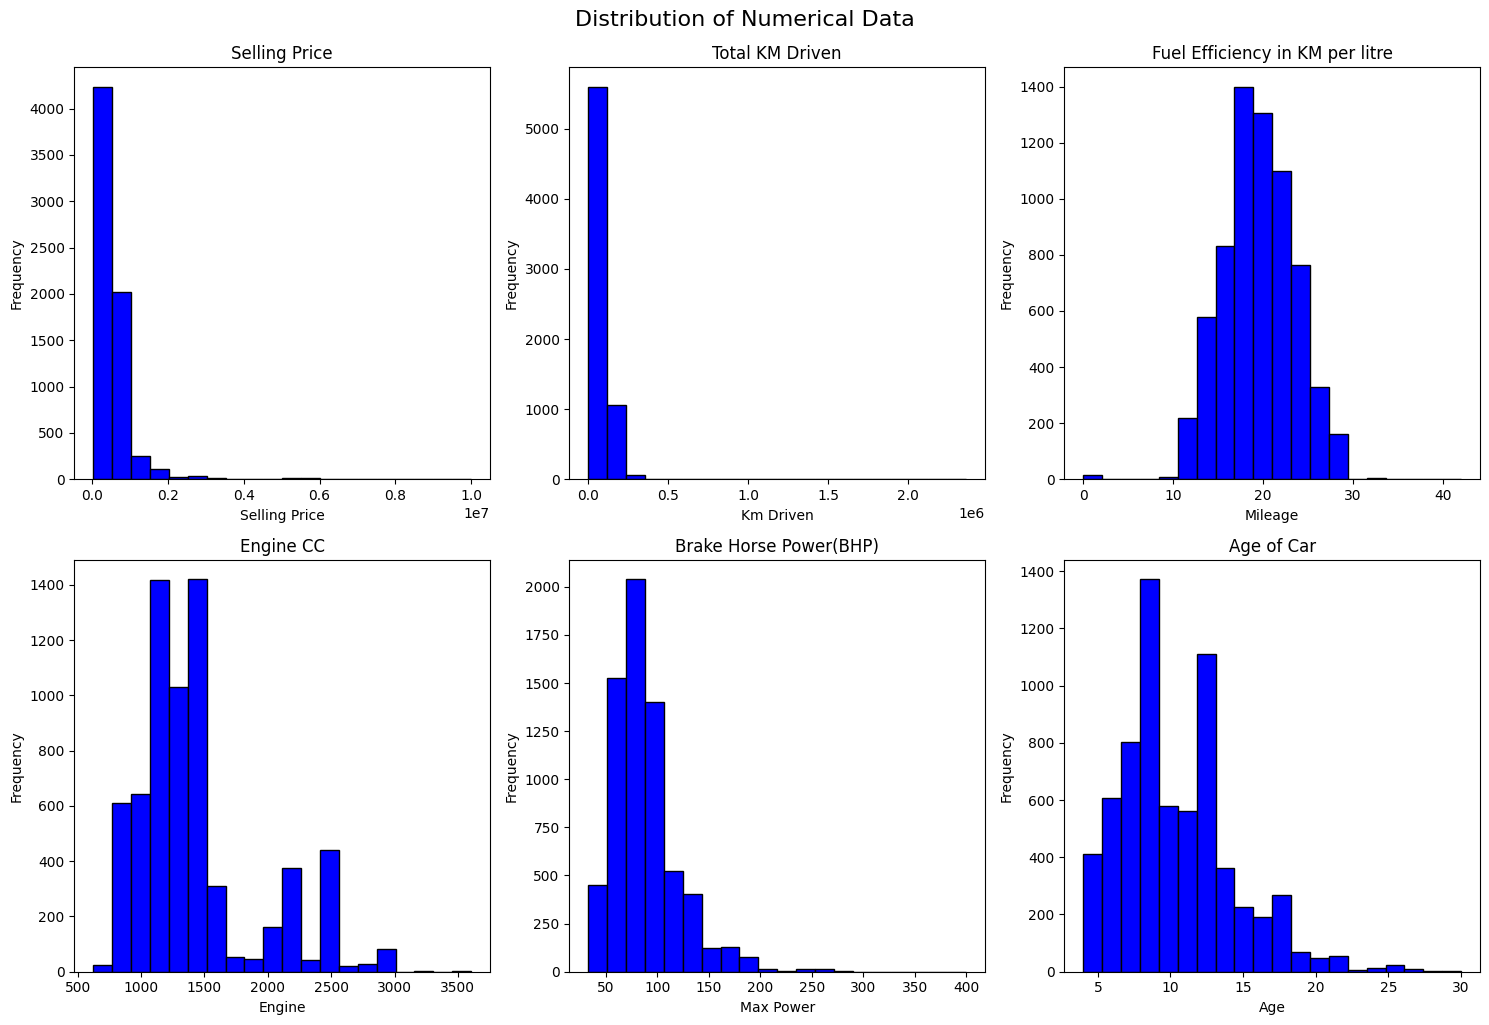

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age']
titles = ["Selling Price", "Total KM Driven", "Fuel Efficiency in KM per litre",
          "Engine CC", "Brake Horse Power(BHP)", "Age of Car"]

for i, (column, title) in enumerate(zip(columns, titles)):
    row, col = divmod(i, 3)
    axes[row, col].hist(df[column], bins=20, color='blue', edgecolor='black')
    axes[row, col].set_title(title)  
    axes[row, col].set_xlabel(column.replace('_', ' ').title())
    axes[row, col].set_ylabel('Frequency') 

plt.tight_layout()

fig.suptitle("Distribution of Numerical Data", fontsize=16, y=1.02)

plt.show()


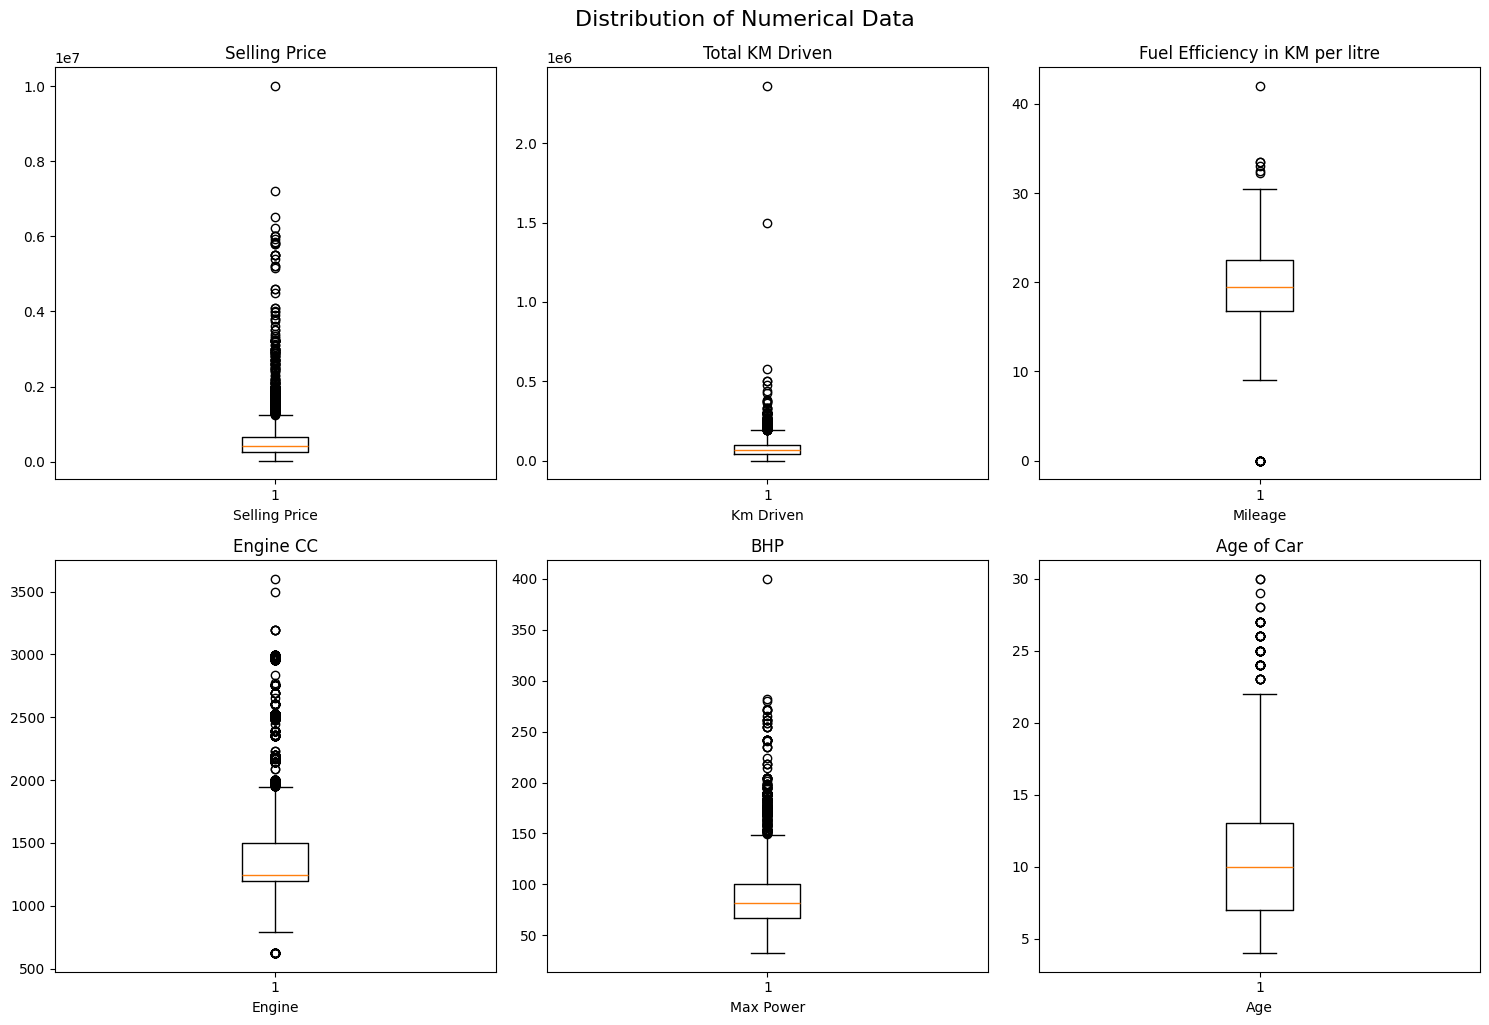

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'age']
titles = ["Selling Price", "Total KM Driven", "Fuel Efficiency in KM per litre",
          "Engine CC", "BHP", "Age of Car"]

for i, (column, title) in enumerate(zip(columns, titles)):
    row, col = divmod(i, 3)
    axes[row, col].boxplot(df[column].dropna())
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel(column.replace('_', ' ').title())

plt.tight_layout()

fig.suptitle("Distribution of Numerical Data", fontsize=16, y=1.02)
plt.show()


✨ Analisis:

Sebagian besar variabel menunjukkan adanya outliers, yang berarti ada kendaraan-kendaraan tertentu yang sangat berbeda dari mayoritas lainnya dalam hal harga jual, jarak tempuh, efisiensi bahan bakar, kapasitas mesin, tenaga mesin, dan umur.

Mayoritas data cenderung terkonsentrasi pada rentang yang lebih rendah, dengan distribusi yang memanjang di arah yang lebih tinggi, terutama untuk variabel seperti harga jual, jarak tempuh, dan kapasitas mesin.


1. Selling Price (Harga Jual)

    Harga jual mobil memiliki banyak outliers yang sangat tinggi, yang terlihat dari adanya titik-titik yang jauh di atas whisker atas. Sebagian besar data berada di rentang yang lebih rendah, dengan harga jual mayoritas mobil relatif rendah dibandingkan beberapa yang memiliki harga sangat tinggi.

2. Total KM Driven (Jarak Tempuh Total)

    Jarak tempuh total juga menunjukkan sejumlah besar outliers dengan beberapa kendaraan yang telah menempuh jarak yang sangat jauh (lebih dari 1 juta km). Mayoritas mobil berada dalam rentang yang lebih kecil, kemungkinan besar antara 0 hingga 200,000 km, dengan sebagian besar data terkonsentrasi pada jarak tempuh yang lebih rendah.

3. Fuel Efficiency in KM per litre (Efisiensi Bahan Bakar dalam KM per Liter)

    Efisiensi bahan bakar terlihat lebih normal dengan beberapa outliers di kedua sisi, baik untuk efisiensi bahan bakar yang sangat tinggi maupun sangat rendah. Kebanyakan mobil memiliki efisiensi bahan bakar yang berkisar antara 15 hingga 25 km/l, yang merupakan rentang umum untuk banyak mobil.
    
4. Engine CC (Kapasitas Mesin dalam CC)

    Kapasitas mesin juga menunjukkan banyak outliers, terutama di sisi atas, dengan beberapa kendaraan memiliki mesin dengan kapasitas yang sangat besar (lebih dari 2500 cc). Sebagian besar kendaraan memiliki mesin dengan kapasitas di bawah 1500 cc, yang umum untuk mobil penumpang.

5. BHP (Brake Horse Power)

    Distribusi tenaga mesin (BHP) menunjukkan bahwa sebagian besar kendaraan memiliki BHP di bawah 150, dengan banyak outliers di sisi atas yang menunjukkan kendaraan dengan tenaga mesin yang sangat tinggi. Mungkin mencakup kendaraan sport atau mobil dengan performa tinggi.

6. Age of Car (Umur Mobil)

    Distribusi umur mobil menunjukkan adanya beberapa mobil yang sangat tua (lebih dari 20 tahun) sebagai outliers.Kebanyakan mobil berada di rentang umur 5 hingga 15 tahun, yang umum untuk mobil bekas di pasaran.

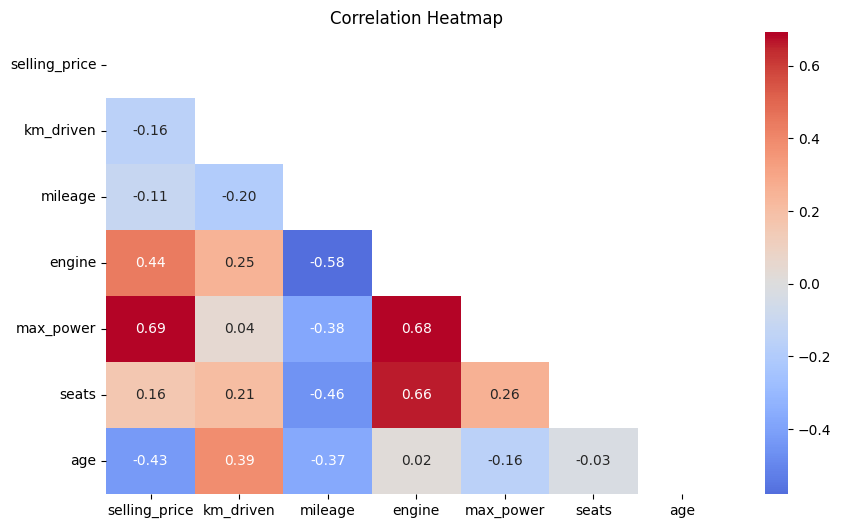

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

✨ Tidak terlihat adanya korelasi yang cukup besar pada data. Sehingga tidak diperlukan penghapusan atau pengurangan fitur.

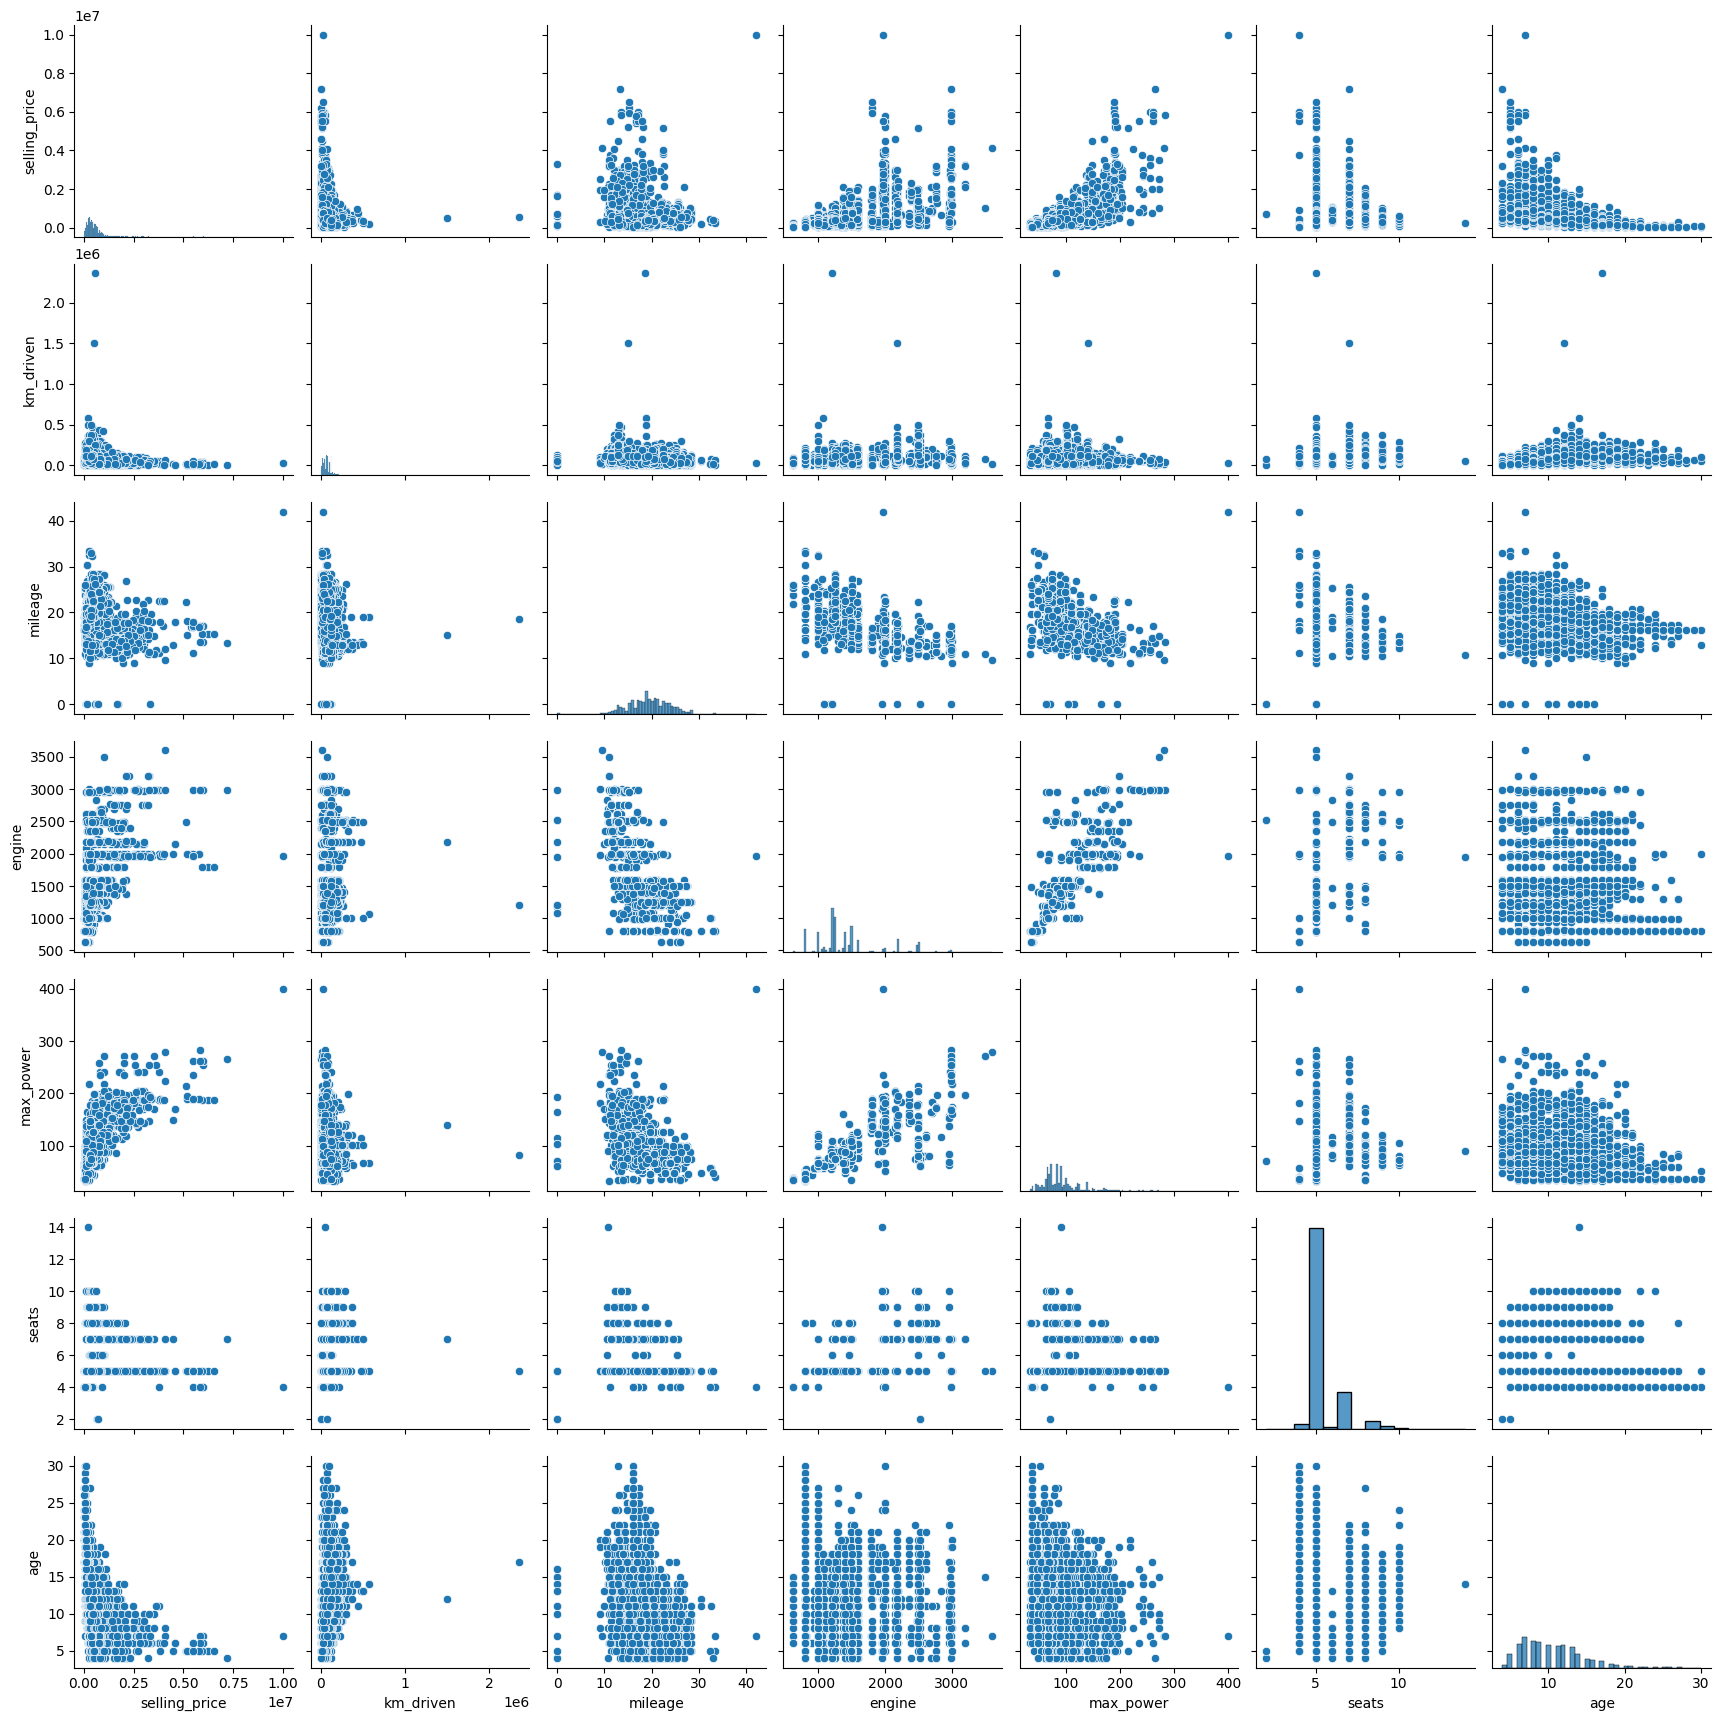

In [23]:
sns.pairplot(df)

# Modeling


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Tanpa Greadsearch

In [72]:
X = df_clean.drop('selling_price', axis=1)
y = df_clean['selling_price']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), categorical_features)
    ])

def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

results = []
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'MSE': round(mse, 2),
        'R^2': round(r2, 2)
    })

results_df = pd.DataFrame(results)
results_df

,Model,MSE,R^2
0,Linear Regression,0.10,0.81
1,Random Forest,0.05,0.91
2,Gradient Boosting,0.05,0.91


### Plot Model Tanpa Gridsearch

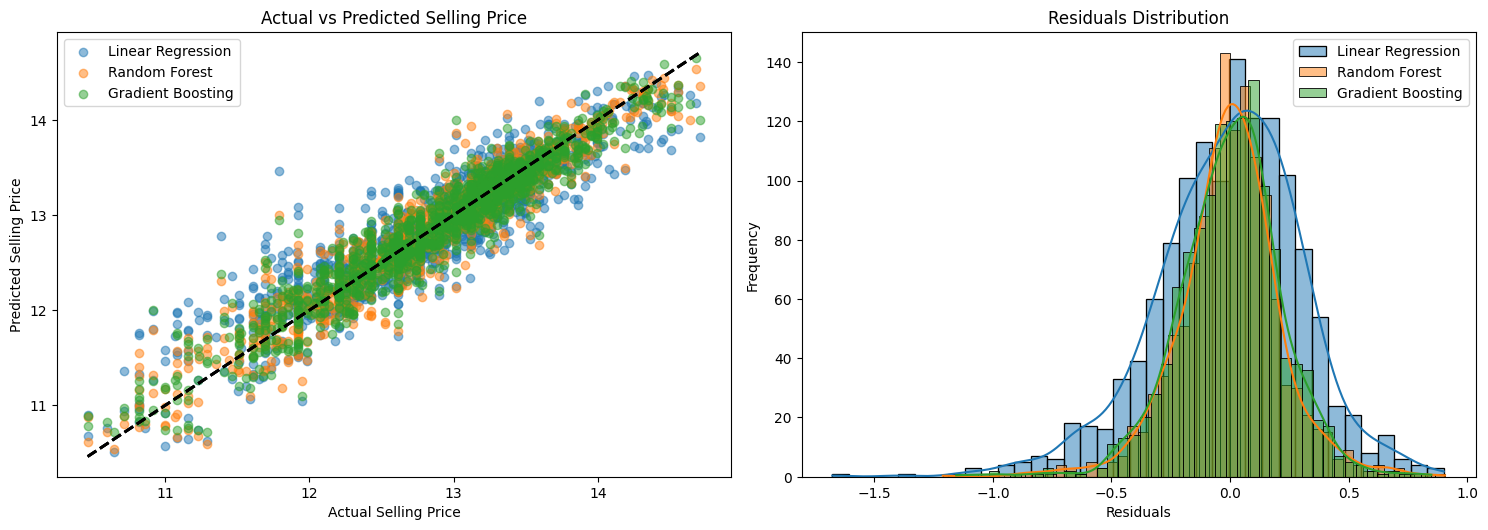

In [73]:
predictions = {}
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    predictions[model_name] = y_pred

plt.figure(figsize=(15, 10))

for model_name, y_pred in predictions.items():
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.title('Actual vs Predicted Selling Price')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, label=model_name, alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals Distribution')
    plt.legend()
    
plt.tight_layout()
plt.show()

### Dengan Grid Search

In [74]:
param_grids = {
    'Linear Regression': {},
    'Random Forest': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7],
    }
}

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = []
best_estimators = {}

for model_name, model in models.items():
    pipeline = create_pipeline(model)
    
    # GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_estimators[model_name] = grid_search.best_estimator_
    
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'MSE': round(mse, 2),
        'R^2': round(r2, 2)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Best Params,MSE,R^2
0,Linear Regression,{},0.10,0.81
1,Random Forest,"{'regressor__max_depth': 20, 'regressor__min_s...",0.05,0.91
2,Gradient Boosting,"{'regressor__learning_rate': 0.2, 'regressor__...",0.04,0.92


### Feature Importance

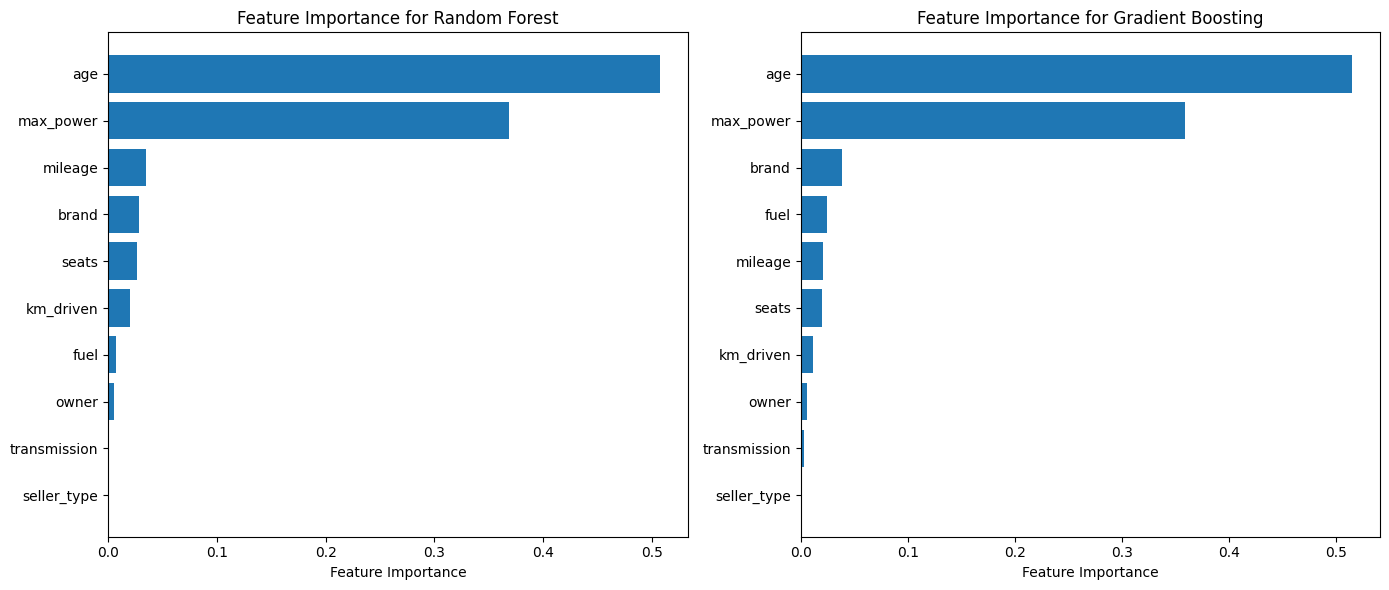

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
i = 0

for model_name, model in best_estimators.items():
    if model_name in ['Random Forest', 'Gradient Boosting']:
        feature_importance = model.named_steps['regressor'].feature_importances_
        features = numerical_features + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['ordinal'].get_feature_names_out(categorical_features))
        
        sorted_idx = np.argsort(feature_importance)
        axes[i].barh(np.array(features)[sorted_idx], feature_importance[sorted_idx])
        axes[i].set_xlabel('Feature Importance')
        axes[i].set_title(f'Feature Importance for {model_name}')
        i += 1
        
        if i == 2:
            break

plt.tight_layout()
plt.show()

### Plot Model - Gridsearch

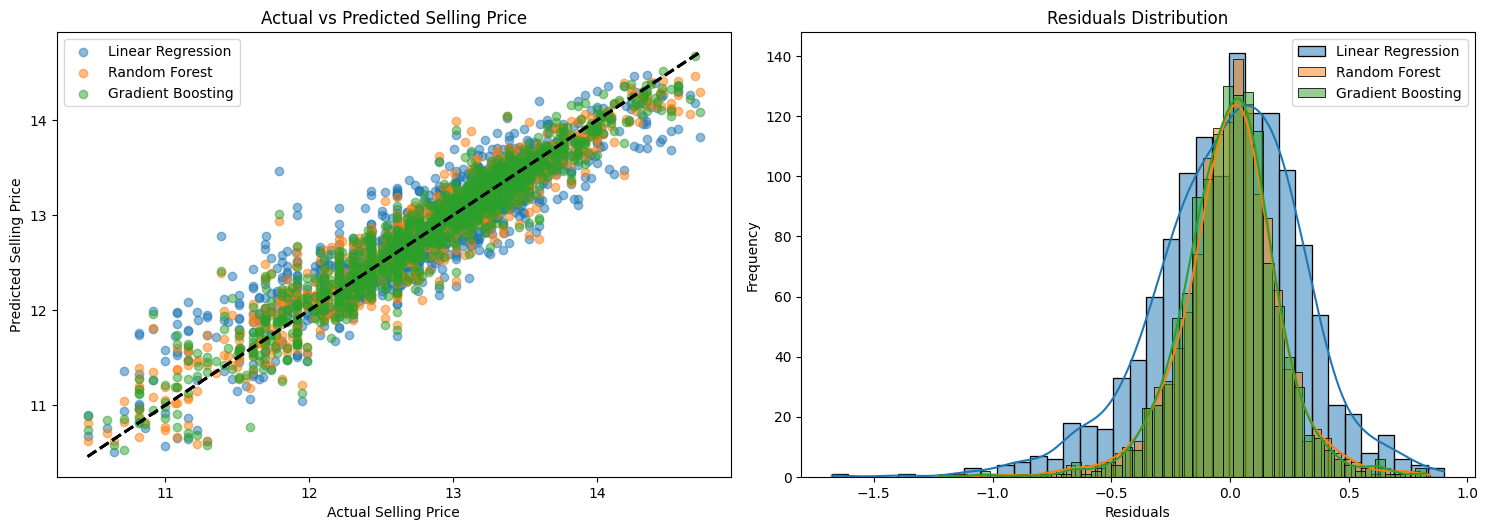

In [76]:
predictions = {}
best_estimators = {}

for model_name, model in models.items():
    pipeline = create_pipeline(model)
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[model_name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    # Menyimpan estimator terbaik dan prediksinya
    best_model = grid_search.best_estimator_
    best_estimators[model_name] = best_model
    y_pred = best_model.predict(X_test)
    predictions[model_name] = y_pred

# Plotting
plt.figure(figsize=(15, 10))

for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    # Plot actual vs predicted selling price
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.title('Actual vs Predicted Selling Price')
    plt.legend()
    
    # Plot residuals distribution
    plt.subplot(2, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, label=model_name, alpha=0.5)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals Distribution')
    plt.legend()

plt.tight_layout()
plt.show()


# Kesimpulan:

Secara keseluruhan, baik Random Forest maupun Gradient Boosting memiliki kinerja yang lebih baik dibandingkan Linear Regression, dengan nilai Mean Squared Error (MSE) sebesar 0,04 dan R² sebesar 0,92. Ini menunjukkan bahwa kedua model tersebut dapat menjelaskan sekitar 92% variabilitas data, lebih tinggi dari Linear Regression yang hanya memiliki R² sebesar 0,87 dengan MSE 0,07.

Observasi dari Grafik:

1. Plot Kiri (Actual vs Predicted Selling Price): Model Gradient Boosting (hijau) menunjukkan prediksi yang paling konsisten dengan garis referensi ideal (hitam putus-putus), diikuti oleh Random Forest (oranye). Linear Regression (biru) memiliki penyebaran yang lebih besar, menunjukkan lebih banyak kesalahan prediksi.

2. Plot Kanan (Residuals Distribution): Distribusi residual dari ketiga model hampir normal, tetapi Gradient Boosting memiliki distribusi residual yang paling terpusat, menunjukkan bias yang lebih rendah dan prediksi yang lebih akurat.

Dari hasil ini, Gradient Boosting dan Random Forest lebih direkomendasikan untuk digunakan dibandingkan Linear Regression dalam kasus ini.